   Università degli Studi di Genova
   
   Well-Being Technologies
   
   By Souad BOUTANE
   
  --------------------------------------------------------
   
 
   # Assignment 1: Neural networks
   

--------------------------------------------------------
**Objectif** :

    > Task 1: Download a benchmark data set
    > Task 2: Train a classification neural net
    > Task 3: Train an autoencoder neural net
   
                                                                                      



----------------------------------------------------------------------
### Task 1: <u> Download a benchmark data set</u>

In this step is required to load semeion-digit dataset Which  consists of 1593 records (rows) and 256 attributes (columns). Each record represents a handwritten digit, orginally scanned with a resolution of 256 grays scale (28).

Each pixel of the each original scanned image was first stretched, and after scaled between 0 and 1. 
Finally, each binary image was scaled again into a 16x16 square box (the final 256 binary attributes).

Using the proposed code to import this data, we get to variable:
 - X : contain input with a shape of (1593, 256)
 - Y : contain output of each input with a shape of (1593, 10)

Then we save the dataset with two first class(0-1), to used it afetr in the third task.
 
 - X_auto : contain input with a shape of (40, 256)
 - Y_auto : contain output of each input with a shape of (40, 2)

Finally we preview some mages of this dataset using matplotlib library of python:
 


Input shape of X   : (1593, 256)
Output shapeof Y   : (1593, 10)


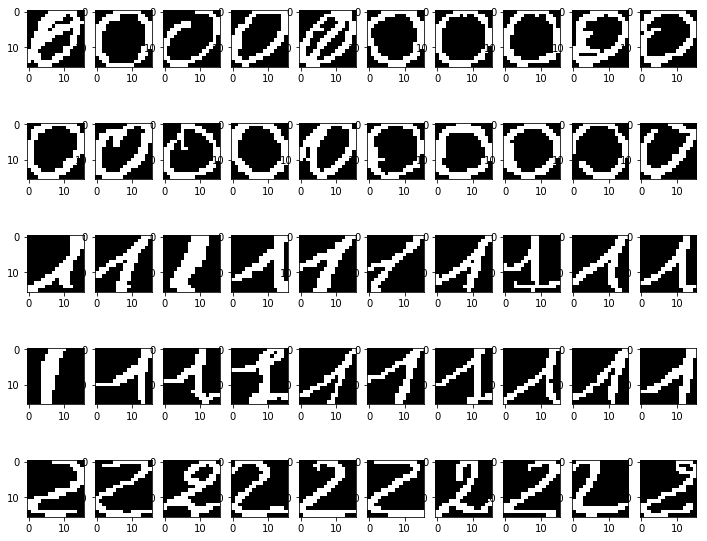

In [334]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

#--------------------------------------------
#    Task 1: Download a benchmark data set
#--------------------------------------------

data=np.loadtxt('data/semeion.data');
X=data[:,0:256].copy();
Y=data[:,-10:data.shape[1]].copy();
X_auto=X[0:40,:].copy();
Y_auto=Y[0:40,0:2].copy();
del(data);

#data shape
print("Input shape of X   :", X.shape)
print("Output shapeof Y   :",Y.shape)

#Preview some images
plt.figure(figsize=(12,10))
x, y = 10, 5
for i in range(50):  
    plt.subplot(y, x, i+1)
    plt.imshow(X[i].reshape((16,16)),cmap='gray')
plt.show()


### Task 2: <u> Train a classification neural net</u>

The dowloaded dataset in the first part  define a 10-class classification problem. We will try to solve this issue in this part using a multi-layer perceptron(MLP), Which consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function.

The goal of this part is to play with the number of layers, number of units per layer, and other features of MLP topologiy, to find the best accuracy.

   **1. <u>Prepare Dataset:</u>**

To be able to use the dataset in Keras API, we need 4-dims numpy arrays for the input. However, as we see above, our array X  is two-dimsion (1593,256).

Then We split the data to two parts :
  
  - Test dataset (x_test,y_test) : contain 20% of the entire dataset, we will used to test our ML at the end.
  - Training dataset (x_tarin,y_tarin) : contain 70%  of the entire dataset, will be used to train the ML.
  - Validation dataset(x_val,y_val): contain 10% of the total data,will be used for tuning the ML.

In addition, we must normalize our data as it is always required in neural network models. We can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code). This can be done with the following code:



In [335]:
#-------- Prepare dataset 

#Split data to 80% for training and 20% for test
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.2)
x_train, x_val, y_train, y_val=train_test_split(x_train, y_train, test_size=0.1)


print("Training shape:",x_train.shape)
print("Test shape    :",x_test.shape)
print("Test shape    :",x_val.shape)

#Normalize the data 
x_train=x_train/2
x_test=x_test/2
x_val=x_val/2



Training shape: (1146, 256)
Test shape    : (319, 256)
Test shape    : (128, 256)


   **2. <u>Build multilayer perceptron MLP :</u>**
   
   We will build our classifier by using high level Keras API which uses either TensorFlow or Theano on the backend.
   We will import the Sequential Model from Keras, then add **two hidden layers** :
   
  
> **Layer 1**: type=Dense, Units=14, activation="rlu"               
> **Layer 2**: type=Dense, Units=10, activation="rlu" 

    and the output layer with sigmoid acivation layer.

In [336]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

#----------------------------------------------
#    Task 2: Train a classification neural net
#----------------------------------------------
input_shape=(16,16,1)

#create classifier
classifier = Sequential()

#First Hidden Layer
classifier.add(Dense(14, activation='relu',input_dim=256))

#Second Hidden Layer
classifier.add(Dense(10, activation='relu'))


#Output Layer
classifier.add(Dense(10, activation='sigmoid', kernel_initializer='random_normal'))




**3. <u>Compile and Fitting the model :</u>**

With the above code, we created an non-optimized empty CNN. Now it is time to set an optimizer with a given loss function which uses a metric.

Then, we can fit the model by using our train data. We will use the following code for these tasks:

In [337]:
#Compiling the neural network
classifier.compile(optimizer ='adam',
                   loss='binary_crossentropy', 
                   metrics =['accuracy'])

#Fitting the data to the training dataset
classifier.fit(x_train,y_train,validation_data=(x_val,y_val), batch_size=3, epochs=10)

Train on 1146 samples, validate on 128 samples
Epoch 1/10
1146/1146 [==============================] - 3s 3ms/step - loss: 0.3709 - acc: 0.8900 - val_loss: 0.2986 - val_acc: 0.9000
Epoch 2/10
1146/1146 [==============================] - 1s 821us/step - loss: 0.2565 - acc: 0.9034 - val_loss: 0.2148 - val_acc: 0.9125
Epoch 3/10
1146/1146 [==============================] - 1s 790us/step - loss: 0.1921 - acc: 0.9213 - val_loss: 0.1676 - val_acc: 0.9414
Epoch 4/10
1146/1146 [==============================] - 1s 785us/step - loss: 0.1581 - acc: 0.9364 - val_loss: 0.1504 - val_acc: 0.9469
Epoch 5/10
1146/1146 [==============================] - 1s 797us/step - loss: 0.1357 - acc: 0.9476 - val_loss: 0.1287 - val_acc: 0.9531
Epoch 6/10
1146/1146 [==============================] - 1s 779us/step - loss: 0.1169 - acc: 0.9572 - val_loss: 0.1266 - val_acc: 0.9563
Epoch 7/10
1146/1146 [==============================] - 1s 786us/step - loss: 0.1013 - acc: 0.9637 - val_loss: 0.1097 - val_acc: 0.9641
Epo

**4. <u>Evaluate the model :</u>**

Finally, we may evaluate the trained model with x_test and y_test using one line of code:

Final loss: 0.066118, Final accuracy: 0.978098


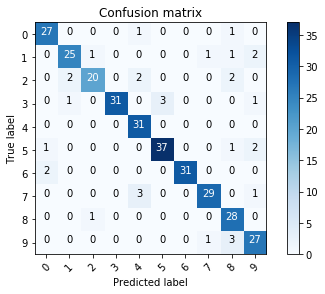

In [338]:
from sklearn.metrics import confusion_matrix


#Evaluate the loss value & metrics values for the model in test mode
final_loss, final_acc=classifier.evaluate(x_train, y_train, verbose=0)
print("Final loss: {0:.6f}, Final accuracy: {1:.6f}".format(final_loss, final_acc))

#Check the accuracy on the test dataset
y_pred=classifier.predict(x_test)
Y_pred= np.argmax(y_pred, axis = 1)
Y_test= np.argmax(y_test, axis = 1)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes = range(10))




**5. <u>Experiment the topology of the classifier :</u>**

In this part, we tried to experiment different values for the number of layers, number of units per layer, and the type of layer, to find the best topology of MLP for this problem.

###### Experiment 1 : Convolutional Neural network
-------------------------------------------
> **Number Of layer** : Three hiden layers
  
> **Layer 1**: type=Convolutional, Units=16 , kernel=9,9             
> **Layer 2**: type=Pooling size=2,2          
>**Layer 2**: type=Flatten


In [339]:
#-------- Prepare dataset 

#Reshape To match Keras's expectation
x_train=x_train.reshape(x_train.shape[0],16,16,1)
x_test=x_test.reshape(x_test.shape[0],16,16,1)
x_val=x_val.reshape(x_val.shape[0],16,16,1)

print("Training shape:",x_train.shape)
print("Test shape    :",x_test.shape)
print("Test shape    :",x_val.shape)

Training shape: (1146, 16, 16, 1)
Test shape    : (319, 16, 16, 1)
Test shape    : (128, 16, 16, 1)


Final loss: 0.053288, Final accuracy: 0.981326


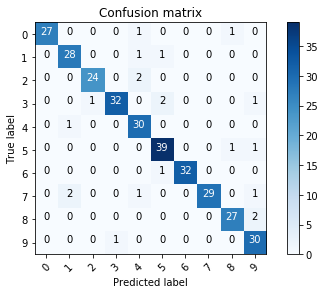

In [340]:
#create classifier
classifier1 = Sequential()

#Hidden Layer
classifier1.add(Conv2D(16, kernel_size=(9,9),input_shape=input_shape))
classifier1.add(MaxPooling2D(pool_size=(2, 2)))
classifier1.add(Flatten())

#Output Layer
classifier1.add(Dense(10, activation='sigmoid', kernel_initializer='random_normal'))

#Compiling 
classifier1.compile(optimizer ='adam',
                   loss='binary_crossentropy', 
                   metrics =['accuracy'])
#Fitting 
classifier1.fit(x_train,y_train,validation_data=(x_val,y_val), batch_size=5, epochs=10,verbose=0)

#Evaluate
final_loss, final_acc=classifier1.evaluate(x_train, y_train, verbose=0)
print("Final loss: {0:.6f}, Final accuracy: {1:.6f}".format(final_loss, final_acc))

#Check the accuracy on the test dataset
y_pred=classifier1.predict(x_test)
Y_pred= np.argmax(y_pred, axis = 1)
Y_test= np.argmax(y_test, axis = 1)

cm = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes = range(10))

###### Experiment 3 : Convolutional Neural network
-------------------------------------------
> **Number Of layer** : Three hiden layers
  
> **Layer 1**: type=Convolutional, Units=16 kernel=3,3           
> **Layer 2**: type=Pooling   size 2,2       
>**Layer 2**: type=Flatten


Final loss: 0.198103, Final accuracy: 0.919808


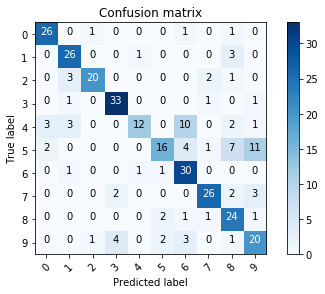

In [341]:
#create classifier
classifier2 = Sequential()

#Hidden Layer
classifier2.add(Conv2D(16, kernel_size=(3,3),input_shape=input_shape))
classifier2.add(MaxPooling2D(pool_size=(5, 5)))
classifier2.add(Flatten())

#Output Layer
classifier2.add(Dense(10, activation='sigmoid', kernel_initializer='random_normal'))

#Compiling 
classifier2.compile(optimizer ='adam',
                   loss='binary_crossentropy', 
                   metrics =['accuracy'])
#Fitting 
classifier2.fit(x_train,y_train,validation_data=(x_val,y_val), batch_size=5, epochs=10,verbose=0)

#Evaluate
final_loss, final_acc=classifier2.evaluate(x_train, y_train, verbose=0)
print("Final loss: {0:.6f}, Final accuracy: {1:.6f}".format(final_loss, final_acc))

#Check the accuracy on the test dataset
y_pred=classifier2.predict(x_test)
Y_pred= np.argmax(y_pred, axis = 1)
Y_test= np.argmax(y_test, axis = 1)

cm = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes = range(10))

###### Conclusion
-------------------------------------------

There is no theoretical rules to choose the number of layer, type of layer or layer's units. but we can see that the convolutional neural network work bettre than multi-layer perceptron. 
The best accuracy that we get with CNN is: Final loss: 0.048496, Final accuracy: 0.983770


### Task 3: <u> Train an autoencoder neural net</u>

In this part, we will build an autoencoder using a shallow multi-layer perceptron with one hidden layer with two units.we will used the prepared data X_auto and Y_auto with only two class (0 and 1).

**What is Autoencoding** : Autoencoding" is a data compression algorithm where the compression and decompression functions are  
>**data-specific**:  they will only be able to compress data similar to what they have been trained on.

>**lossy**: the decompressed outputs will be degraded compared to the original inputs.

>**learned automatically** from examples rather than engineered by a human. 

<img src="./img/auto.png"></img>

To build an autoencoder, we need three things: an encoding function, a decoding function, and a distance function between the amount of information loss between the compressed representation of  data and the decompressed representation.

In this part we will build our autoencoder, starting with a single fully-connected neural layer as encoder and as decoder:

>**Encoder** : compress the image from 256 to 2 dimension

>**Decoder** : reconstruct the image of 256 from 2 dimension 

In [342]:
from keras.layers import Input, Dense
from keras.models import Model

# The size of encoded/Comressed representation, and Reconstructed representations
encoding_dim = 2  
decoding_dim = 256
# this is our input placeholder
input_img = Input(shape=(256,))


#----------First model of "Encoder" (in schema) that maps an input to its encoded representation

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoder = Model(input_img, encoded)


#----------Second Model of autoencoder that maps an input to its reconstruction

# "decoded" is the lossy reconstruction of the input
decoded = Dense(decoding_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)


# ---------Third model of decoder that maps an emcoded representation to its reconstruction


# create a placeholder for an encoded (2-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))


#Compile our build autoencoder
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


Then we prepare our data X_auto and Y_auto:

>**Split** data to training set and test set

>**Normalize** the data between 0 and 1 by divide on 255 .

Note: spliting the data in this case is not a good idea, because we have only 40 records which is not enough for training the NN.

In [246]:
#Split data to 80% for training and 20% for test

x_train, x_test, y_train, y_test=train_test_split(X_auto, Y_auto, test_size=0.2)

#Normalize data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
 
print (x_train.shape)
print (x_test.shape)

(32, 256)
(8, 256)


Now let's train our autoencoder for 500 epochs (we tried before with small value but it doesn't give good results), and evaluate it:

In [253]:
autoencoder.fit(x_train, x_train,
                epochs=500,
                batch_size=2,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=1)


Train on 32 samples, validate on 8 samples
Epoch 1/500
32/32 [==============================] - 0s 906us/step - loss: 0.0096 - val_loss: 0.0088
Epoch 2/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 3/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 4/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 5/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 6/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 7/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 8/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 9/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 10/500
32/32 [==============================] - 0s 1ms/ste

32/32 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 83/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 84/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 85/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 86/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 87/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 88/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 89/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 90/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 91/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 92/500


32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 164/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 165/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 166/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 167/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 168/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 169/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 170/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 171/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 172/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoc

32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 245/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 246/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 247/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 248/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 249/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 250/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 251/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 252/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 253/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoc

32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 326/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 327/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 328/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 329/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 330/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 331/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 332/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 333/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 334/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoc

32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 407/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 408/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 409/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 410/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 411/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 412/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 413/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 414/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 415/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoc

Epoch 487/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 488/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 489/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 490/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 491/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 492/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 493/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 494/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 495/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 496/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0095 - val_los

After 4 epochs, the autoencoder seems to reach a stable train/test loss value of about 0.011. We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.

In [254]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

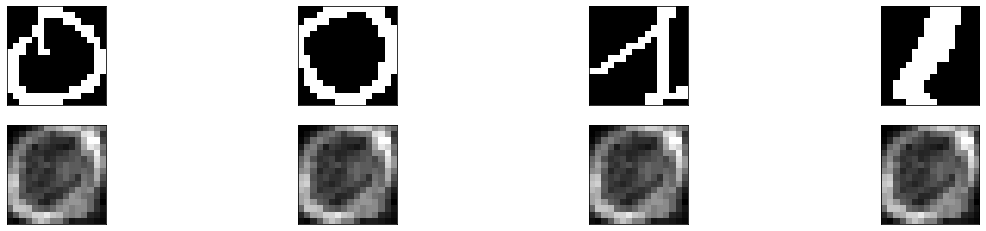

In [257]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n =4  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(16, 16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(16, 16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Here's what we get. The top row is the original digits, and the bottom row is the reconstructed digits. We are losing many bit of detail with this basic approach, and you can see that the encoded image are not clear, and present all of them the number 0.

The output of the encode phase is a 8x2 for test dataset and 32x2 for training dataset. to understand more the results we will try to plot the results on a graphic with two different colours, red for the class number 1, blue for the class number 2. we can plot each element of the matrix using the first element as X coordinate, and the second as Y coordinate.

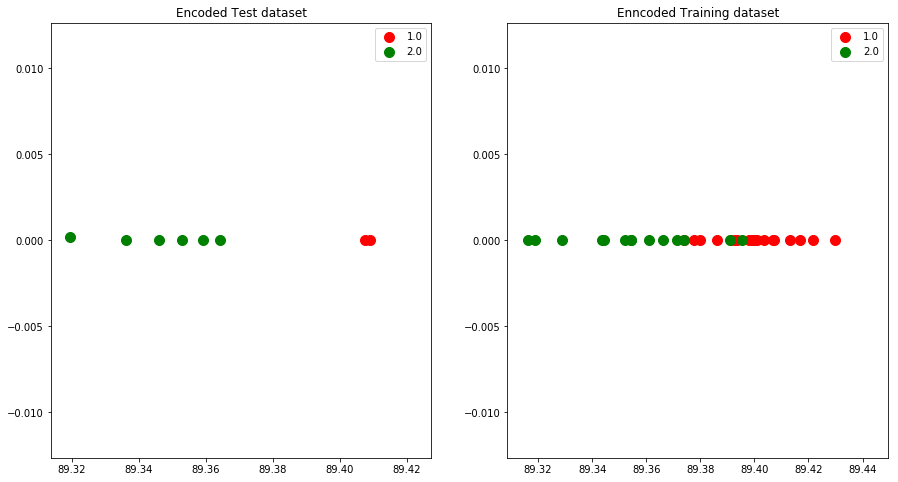

In [256]:
import numpy as np
from matplotlib import pyplot as plt


#=================Plot  test data

x_test_encoded = encoder.predict(x_test, batch_size=50)
target = np.array(y_test[:,1])+1

x = np.array(x_test_encoded[:, 0]*10)
y = np.array(x_test_encoded[:, 1]*10)

cdict = {1: 'red', 2: 'green'}

fig, ax = plt.subplots(1,2,figsize=(15,8))
for g in np.unique(target):
    tst = np.where(target == g)
    ax[0].scatter(x[tst], y[tst], c = cdict[g], label = g, s = 100)
ax[0].legend()
ax[0].set_title("Encoded Test dataset")


#===============Plot  training data
x_train_encoded = encoder.predict(x_train, batch_size=50)
target = np.array(y_train[:,1])+1

x = np.array(x_train_encoded[:, 0]*10)
y = np.array(x_train_encoded[:, 1]*10)

for g in np.unique(target):
    tr = np.where(target == g)
    ax[1].scatter(x[tr], y[tr], c = cdict[g], label = g, s = 100)
ax[1].legend()
ax[1].set_title("Enncoded Training dataset")


#plt.xlim(0, 1)
#plt.ylim(0, 1)
    
plt.show()

After many experiment, by testing many values of batch_size and epoch, we could get this result:
After Ploting the value of the hidden units (encoded images) on a scatterplot. We can see that the plot  divide the point according to their class, each class present a specific number 1 or 2. 
Summarizing, the output of the encode phase of autoencoder give us a classification of the two classes.
